In [1]:
import numpy as np 
import pyGPs as gp 
import sklearn.metrics as mt
import matplotlib.pyplot as plt
import scipy as sp
import os
os.chdir("/Users/RayneHernandez1/Desktop/NextFlu") 
import pandas as pd 
from scipy import signal
from scipy.stats import norm
from sklearn import mixture
import statsmodels.tsa.arima_model as ar
import pyflux as pf

/Users/RayneHernandez1/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data_17 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/ILINet_16-17.csv", header = 1)
data_16 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_15-16.csv", header = 1)
data_15 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_14-15.csv", header = 1)
data_14 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_13-14.csv", header = 1)
data_13 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_12-13.csv", header = 1)
data_12 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_11-12.csv", header = 1)
data_11 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_10-11.csv", header = 1)
data_10 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_9-10.csv", header = 1)
data_9 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_8-9.csv", header = 1)
data_8 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_7-8.csv", header = 1)

In [3]:
week_17 = data_17["WEEK"]
week_16 = data_16["WEEK"]
week_15 = data_15["WEEK"]
week_14 = data_14["WEEK"]
week_13 = data_13["WEEK"]
week_12 = data_12["WEEK"]
week_11 = data_11["WEEK"]
week_10 = data_10["WEEK"]
week_9 = data_9["WEEK"]
week_8 = data_8["WEEK"]

In [4]:
ILI_17 = data_17['% WEIGHTED ILI']
ILI_16 = data_16['% Weighted ILI ']
ILI_15 = data_15['% Weighted ILI ']
ILI_14 = data_14['% Weighted ILI ']
ILI_13 = data_13['% Weighted ILI ']
ILI_12 = data_12['% Weighted ILI ']
ILI_11 = data_11['% Weighted ILI ']
ILI_10 = data_10['% Weighted ILI ']
ILI_9 = data_9['% Weighted ILI ']
ILI_8 = data_8['% Weighted ILI ']
ILI = np.concatenate((ILI_8, ILI_9, ILI_10, ILI_11, ILI_12))

In [5]:
data_phyl = pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/USCanada_Effpop_1998-2012.csv", header = 0)


In [6]:
time_phyl = data_phyl["time"]
time_phyl = np.array(time_phyl)
effPop = data_phyl["effPop"]
effPop = np.array(effPop)

In [7]:
time_8 = np.concatenate((np.arange(start = 2007 + (1/52)*39, stop = 2007 + (1/52)*51, step = (1/52)), \
                         np.arange(start = 2008, stop = 2008 + (1/53)*38, step = (1/53))))
time_9 = np.concatenate((np.arange(start = 2008 + (1/53)*39, stop = 2008 + (1/53)*52, step = (1/53)), \
                         np.arange(start = 2009, stop = 2009 + (1/52)*33, step = (1/52))))
time_10 = np.concatenate((np.arange(start = 2009 + (1/52)*34, stop = 2009 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2010, stop = 2010 + (1/52)*38, step = (1/52))))
time_11 = np.concatenate((np.arange(start = 2010 + (1/52)*39, stop = 2010 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2011, stop = 2011 + (1/52)*38, step = (1/52))))
time_12 = np.concatenate((np.arange(start = 2011 + (1/52)*39, stop = 2011 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2012, stop = 2012 + (1/52)*38, step = (1/52))))
time_13 = np.concatenate((np.arange(start = 2012 + (1/52)*39, stop = 2012 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2013, stop = 2013 + (1/52)*38, step = (1/52))))
time_14 = np.concatenate((np.arange(start = 2013 + (1/52)*39, stop = 2013 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2014, stop = 2014 + (1/53)*38, step = (1/53))))
time_15 = np.concatenate((np.arange(start = 2014 + (1/53)*39, stop = 2014 + (1/53)*52, step = (1/53)), \
                          np.arange(start = 2015, stop = 2015 + (1/52)*38, step = (1/52))))
time_16 = np.concatenate((np.arange(start = 2015 + (1/52)*39, stop = 2015 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2016, stop = 2016 + (1/52)*38, step = (1/52))))
time = np.concatenate((time_8, time_9, time_10, time_11, time_12)) 

In [8]:
def RBReg(x, y, x_test) : 
    k = gp.Core.cov.RBF()
    print(k.hyp)
    model = gp.Core.gp.GPR() 
    #model.setNoise( log_sigma = np.log(0.01) )
    model.setPrior(kernel=k)
    model.setData(x, y) 
    model.getPosterior()
    model.setOptimizer("Minimize")
    model.optimize(x, y)
    ym, ys2, fm, fs2, lp = model.predict(x_test)
    #model.plot()
    print(k.hyp)
    print(model.nlZ)
    return model

In [9]:
def cross_corr(x, y, lag) :
    return sp.stats.pearsonr(x[lag:x.size], y[0:(y.size - lag)])

In [104]:
cross_corr(y_train, np.exp(y_train), 0)

(array([ 0.93218889]), array([  2.69658289e-70]))

In [30]:
def plotGraphs(label, results_gp):
    plt.subplot(2, 2, 1)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC ILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[3:,0] - 3), label = label, color = "red")
    plt.title("0 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 2)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[2:-1,1] - 3), label = label, color = "red")
    plt.title("1 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 3)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[1:-2,2] - 3), label = label, color = "red")
    plt.title("2 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 4)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[0:-3,3] - 3), label = label, color = "red")
    plt.title("3 Week Forecast")
    plt.legend(loc='upper left')

    plt.show()
    plt.figure(figsize = (11, 9))


    correlation_gp = np.array([np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3))[0][1], 
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3))[0][1],
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3))[0][1],
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))[0][1]])
    rmse_gp = np.sqrt(np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))]))
    mse_gp = np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))])
    mae_gp = np.array([mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))])

    d_gp = {"Correlation": correlation_gp, "RMSE": rmse_gp, "MSE": mse_gp, "MAE": mae_gp}
    df_gp = pd.DataFrame(data=d_gp, index = ["0 wk", "1 wk", "2 wk", "3 wk"])
    print(df_gp)
    
    
def plot2Graphs(label, results_gp, label_2, results_gp2):
    plt.subplot(2, 2, 1)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC ILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[3:,0] - 3), label = label, color = "red")
    plt.plot(x_test, np.exp(results_gp2[3:,0] - 3), label = label_2, color = "purple")
    plt.title("0 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 2)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[2:-1,1] - 3), label = label, color = "red")
    plt.plot(x_test, np.exp(results_gp2[2:-1,1] - 3), label = label_2, color = "purple")
    plt.title("1 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 3)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[1:-2,2] - 3), label = label, color = "red")
    plt.plot(x_test, np.exp(results_gp2[1:-2,2] - 3), label = label_2, color = "purple")
    plt.title("2 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 4)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[0:-3,3] - 3), label = label, color = "red")
    plt.plot(x_test, np.exp(results_gp2[0:-3,3] - 3), label = label_2, color = "purple")
    plt.title("3 Week Forecast")
    plt.legend(loc='upper left')

    plt.show()
    plt.figure(figsize = (11, 9))
    

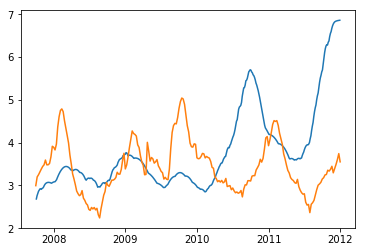

In [11]:
time_phyl_range = time_phyl[np.logical_and(time_phyl >= 2007.75, time_phyl <= 2012)]
effPop_range = effPop[np.logical_and(time_phyl >= 2007.75, time_phyl <= 2012)]

time_range = time[np.logical_and(time >= 2007.75, time <= 2012)]
ILI_range = 3 + np.log(ILI[np.logical_and(time >= 2007.75, time <= 2012)])

plt.plot(time_phyl_range, effPop_range)
plt.plot(time_range, ILI_range)
plt.show()

In [12]:
model = RBReg(time_phyl_range, effPop_range, time_range)
x_effPop = model.ym.reshape(model.ym.size)
y_ILI = ILI_range

[0.0, 0.0]


Number of line searches 31


[-2.4461877724473706, -0.2449334612099744]
-844.907404258


In [13]:
test_indices = np.argwhere(np.logical_and(time_range >= (2010 + (1/52)*39), time_range <= 2011 + (1/52)*38))
train_indices = np.argwhere(time_range <= (2010 + (1/52)*38))
x_train = time_range[train_indices]
y_train = y_ILI[train_indices]
x_test = time_range[test_indices]
y_test = y_ILI[test_indices]


effPop_train = x_effPop[train_indices]
effPop_test = x_effPop[test_indices]

In [14]:
trend_data = pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/correlate-CDC_ILI.csv", header = 0)

In [15]:
word_1 = np.array(trend_data.iloc[195:418,2])
word_2 = np.array(trend_data.iloc[195:418,3])
word_3 = np.array(trend_data.iloc[195:418,4])
word_4 = np.array(trend_data.iloc[195:418,5])
word_5 = np.array(trend_data.iloc[195:418,6])
word_6 = np.array(trend_data.iloc[195:418,7])
word_7 = np.array(trend_data.iloc[195:418,8])
word_8 = np.array(trend_data.iloc[195:418,9])
word_9 = np.array(trend_data.iloc[195:418,10])
word_10 = np.array(trend_data.iloc[195:418,11])
word_11 = np.array(trend_data.iloc[195:418,12])
word_12 = np.array(trend_data.iloc[195:418,13])
word_13 = np.array(trend_data.iloc[195:418,14])
word_14 = np.array(trend_data.iloc[195:418,15])
word_15 = np.array(trend_data.iloc[195:418,16])
word_16 = np.array(trend_data.iloc[195:418,17])
word_17 = np.array(trend_data.iloc[195:418,18])
word_18 = np.array(trend_data.iloc[195:418,19])

In [16]:
word_1_train = word_1[train_indices]
word_2_train = word_2[train_indices]
word_3_train = word_3[train_indices]
word_4_train = word_4[train_indices]
word_5_train = word_5[train_indices]
word_6_train = word_6[train_indices]
word_7_train = word_7[train_indices]
word_8_train = word_8[train_indices]
word_9_train = word_9[train_indices]
word_10_train = word_10[train_indices]
word_11_train = word_11[train_indices]
word_12_train = word_12[train_indices]
word_13_train = word_13[train_indices]
word_14_train = word_14[train_indices]
word_15_train = word_15[train_indices]
word_16_train = word_16[train_indices]
word_17_train = word_17[train_indices]
word_18_train = word_18[train_indices]

word_1_test = word_1[test_indices]
word_2_test = word_2[test_indices]
word_3_test = word_3[test_indices]
word_4_test = word_4[test_indices]
word_5_test = word_5[test_indices]
word_6_test = word_6[test_indices]
word_7_test = word_7[test_indices]
word_8_test = word_8[test_indices]
word_9_test = word_9[test_indices]
word_10_test = word_10[test_indices]
word_11_test = word_11[test_indices]
word_12_test = word_12[test_indices]
word_13_test = word_13[test_indices]
word_14_test = word_14[test_indices]
word_15_test = word_15[test_indices]
word_16_test = word_16[test_indices]
word_17_test = word_17[test_indices]
word_18_test = word_18[test_indices]

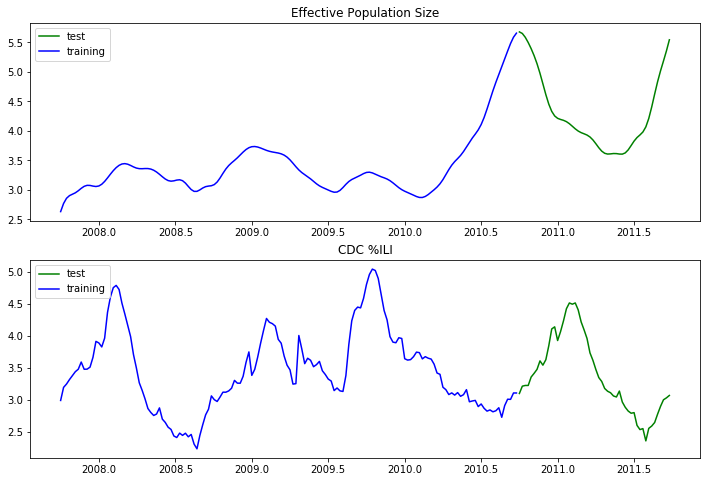

In [63]:
plt.subplot(2, 1, 1)
plt.title("Effective Population Size")
plt.plot(x_test, effPop_test, color = "green", label = "test")
plt.plot(x_train, effPop_train, color = "blue", label = "training")
plt.legend(loc='upper left')


plt.subplot(2, 1, 2)
plt.title("CDC %ILI")
plt.plot(x_test, y_test, color = "green", label = "test")
plt.plot(x_train, y_train, color = "blue", label = "training")
plt.legend(loc='upper left')
plt.show()
plt.figure(figsize = (12, 8))

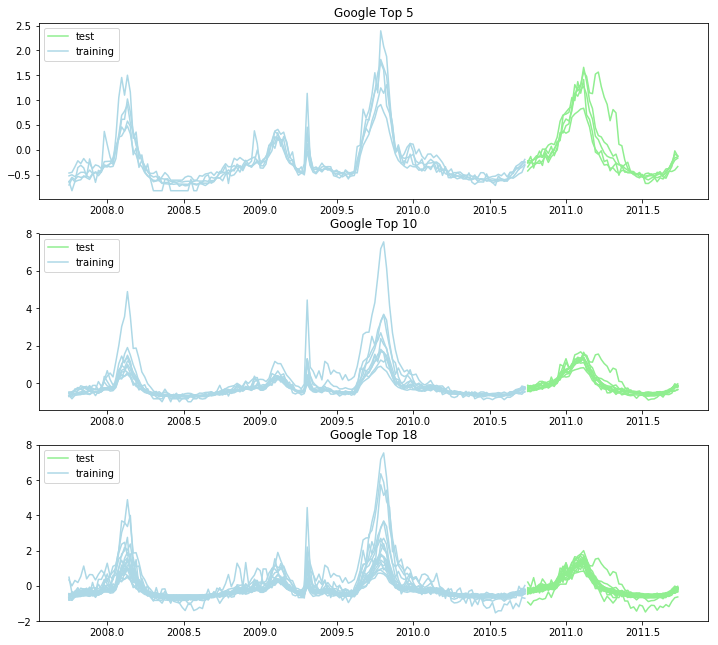

In [52]:
plt.subplot(3, 1, 1)
plt.title("Google Top 5")
plt.plot(x_test, word_1_test, color = "lightgreen", label = 'test')
plt.plot(x_test, word_2_test, color = "lightgreen")
plt.plot(x_test, word_3_test, color = "lightgreen")
plt.plot(x_test, word_4_test, color = "lightgreen")
plt.plot(x_test, word_5_test, color = "lightgreen")
plt.plot(x_train, word_1_train, color = "lightblue", label = 'training')
plt.plot(x_train, word_2_train, color = "lightblue")
plt.plot(x_train, word_3_train, color = "lightblue")
plt.plot(x_train, word_4_train, color = "lightblue")
plt.plot(x_train, word_5_train, color = "lightblue")
plt.legend(loc='upper left')

plt.subplot(3, 1, 2)
plt.title("Google Top 10")
plt.plot(x_test, word_1_test, color = "lightgreen", label = 'test')
plt.plot(x_test, word_2_test, color = "lightgreen")
plt.plot(x_test, word_3_test, color = "lightgreen")
plt.plot(x_test, word_4_test, color = "lightgreen")
plt.plot(x_test, word_5_test, color = "lightgreen")
plt.plot(x_test, word_6_test, color = "lightgreen")
plt.plot(x_test, word_7_test, color = "lightgreen")
plt.plot(x_test, word_8_test, color = "lightgreen")
plt.plot(x_test, word_9_test, color = "lightgreen")
plt.plot(x_test, word_10_test, color = "lightgreen")
plt.plot(x_train, word_1_train, color = "lightblue", label = 'training')
plt.plot(x_train, word_2_train, color = "lightblue")
plt.plot(x_train, word_3_train, color = "lightblue")
plt.plot(x_train, word_4_train, color = "lightblue")
plt.plot(x_train, word_5_train, color = "lightblue")
plt.plot(x_train, word_6_train, color = "lightblue")
plt.plot(x_train, word_7_train, color = "lightblue")
plt.plot(x_train, word_8_train, color = "lightblue")
plt.plot(x_train, word_9_train, color = "lightblue")
plt.plot(x_train, word_10_train, color = "lightblue")
plt.legend(loc='upper left')

plt.subplot(3, 1, 3)
plt.title("Google Top 18")
plt.plot(x_test, word_1_test, color = "lightgreen", label = 'test')
plt.plot(x_test, word_2_test, color = "lightgreen")
plt.plot(x_test, word_3_test, color = "lightgreen")
plt.plot(x_test, word_4_test, color = "lightgreen")
plt.plot(x_test, word_5_test, color = "lightgreen")
plt.plot(x_test, word_6_test, color = "lightgreen")
plt.plot(x_test, word_7_test, color = "lightgreen")
plt.plot(x_test, word_8_test, color = "lightgreen")
plt.plot(x_test, word_9_test, color = "lightgreen")
plt.plot(x_test, word_10_test, color = "lightgreen")
plt.plot(x_test, word_11_test, color = "lightgreen")
plt.plot(x_test, word_12_test, color = "lightgreen")
plt.plot(x_test, word_13_test, color = "lightgreen")
plt.plot(x_test, word_14_test, color = "lightgreen")
plt.plot(x_test, word_15_test, color = "lightgreen")
plt.plot(x_test, word_16_test, color = "lightgreen")
plt.plot(x_test, word_17_test, color = "lightgreen")
plt.plot(x_test, word_18_test, color = "lightgreen")
plt.plot(x_train, word_1_train, color = "lightblue", label = 'training')
plt.plot(x_train, word_2_train, color = "lightblue")
plt.plot(x_train, word_3_train, color = "lightblue")
plt.plot(x_train, word_4_train, color = "lightblue")
plt.plot(x_train, word_5_train, color = "lightblue")
plt.plot(x_train, word_6_train, color = "lightblue")
plt.plot(x_train, word_7_train, color = "lightblue")
plt.plot(x_train, word_8_train, color = "lightblue")
plt.plot(x_train, word_9_train, color = "lightblue")
plt.plot(x_train, word_10_train, color = "lightblue")
plt.plot(x_train, word_11_train, color = "lightblue")
plt.plot(x_train, word_12_train, color = "lightblue")
plt.plot(x_train, word_13_train, color = "lightblue")
plt.plot(x_train, word_14_train, color = "lightblue")
plt.plot(x_train, word_15_train, color = "lightblue")
plt.plot(x_train, word_16_train, color = "lightblue")
plt.plot(x_train, word_17_train, color = "lightblue")
plt.plot(x_train, word_18_train, color = "lightblue")
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize = (12, 11))

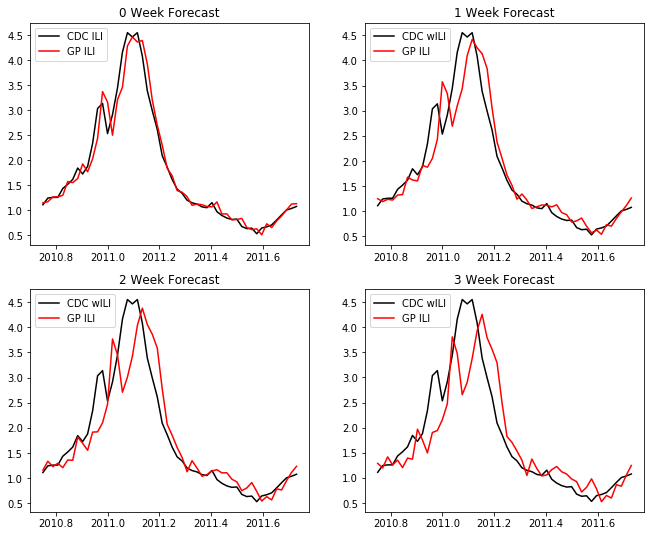

      Correlation       MAE       MSE      RMSE
0 wk     0.981558  0.141072  0.047669  0.218332
1 wk     0.938384  0.252600  0.156082  0.395073
2 wk     0.902325  0.312965  0.243347  0.493303
3 wk     0.862509  0.397064  0.336206  0.579832


In [32]:
results_gp = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_gp.csv", delimiter = ",")
plotGraphs("GP ILI", results_gp)

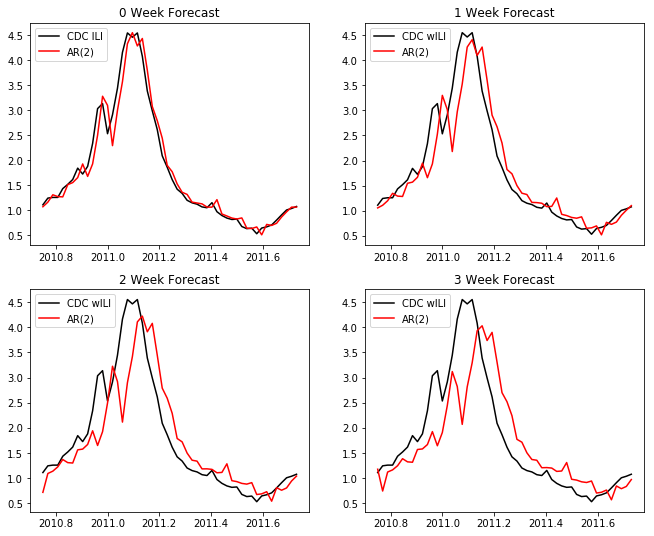

      Correlation       MAE       MSE      RMSE
0 wk     0.980153  0.153297  0.051333  0.226568
1 wk     0.928762  0.275247  0.179799  0.424027
2 wk     0.863848  0.386077  0.333770  0.577728
3 wk     0.789624  0.502630  0.496523  0.704644


In [33]:
results_ar = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_ar.csv", delimiter = ",")
plotGraphs("AR(2)", results_ar)

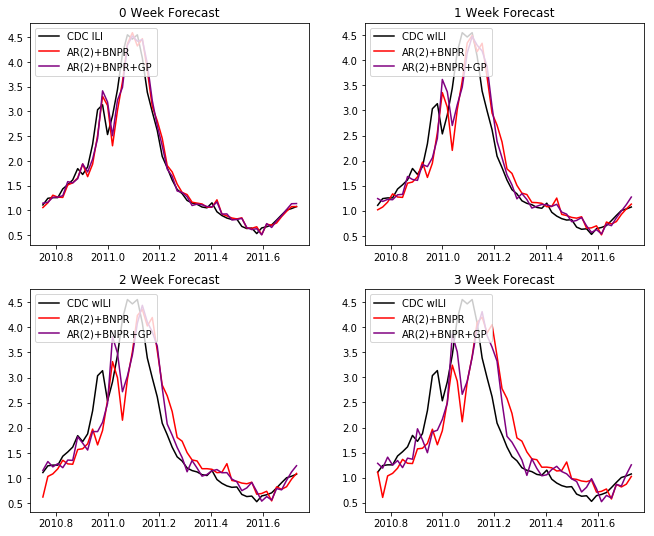

In [35]:
results_sar_eff = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_eff.csv", delimiter = ",")
results_sar_eff_gp = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_eff_gp.csv", delimiter = ",")
plot2Graphs("AR(2)+BNPR", results_sar_eff, "AR(2)+BNPR+GP", results_sar_eff_gp)

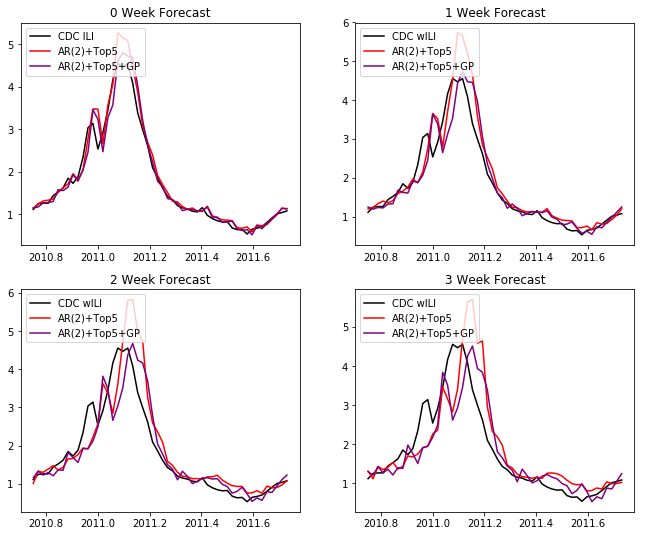

In [36]:
results_sar_top5 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top5.csv", delimiter = ",")
results_sar_top5_gp = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top5_gp.csv", delimiter = ",")
plot2Graphs("AR(2)+Top5", results_sar_top5, "AR(2)+Top5+GP", results_sar_top5_gp)

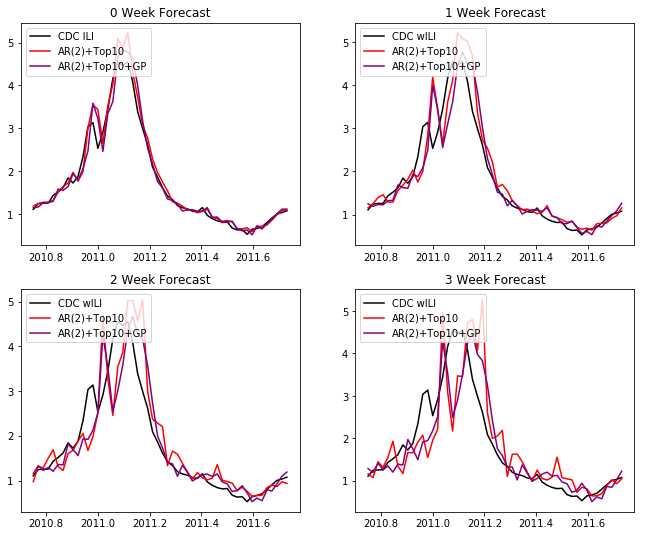

In [37]:
results_sar_top10 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top10.csv", delimiter = ",")
results_sar_top10_gp = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top10_gp.csv", delimiter = ",")
plot2Graphs("AR(2)+Top10", results_sar_top10, "AR(2)+Top10+GP", results_sar_top10_gp)

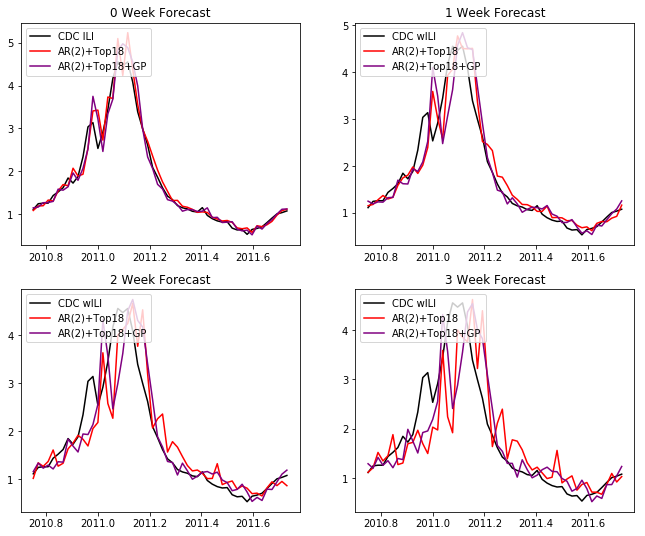

In [38]:
results_sar_top18 = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top18.csv", delimiter = ",")
results_sar_top18_gp = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_top18_gp.csv", delimiter = ",")
plot2Graphs("AR(2)+Top18", results_sar_top18, "AR(2)+Top18+GP", results_sar_top18_gp)